<a href="https://colab.research.google.com/github/KZoc/Analise_da_Mortalidade_Brasil_2020/blob/main/An%C3%A1lise_da_Mortalidade_Geral_em_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos Dados de Mortalidade Geral de 2020

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### A Fonte dos Dados e o Dicionário dos dados foram obtidos no site:
https://opendatasus.saude.gov.br/dataset/sim

## Importação e Leitura dos Dados

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 300)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets - Brasil/Mortalidade_Geral_2020.csv', sep = ';', header = 0, low_memory = False)

In [5]:
df.head(5)

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CB_PRE,COMUNSVOIM,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,NUMEROLOTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,18052020,1452.0,812.0,120010.0,7061932.0,487,1,4.0,3.0,2.0,1.0,NaN,999993.0,120025,1,2001500.0,NaN,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*R99X,NaN,NaN,NaN,NaN,R99,NaN,NaN,18052020.0,NaN,NaN,NaN,20200010.0,NaN,NaN,R99,22052020.0,1.0,S,S,3.2.30,3.2,NaN,29052020.0,R99,29052020,NaN,NaN,10.0,0.0,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603
1,1,2,20052020,2115.0,812.0,120010.0,16031952.0,468,2,4.0,1.0,2.0,1.0,NaN,999993.0,120010,5,NaN,NaN,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*I219,*K86X,*T93X,NaN,NaN,K869,NaN,NaN,20052020.0,NaN,NaN,NaN,20200011.0,S,4062020.0,R99,28052020.0,5.0,S,S,3.2.30,3.2,2.0,18062020.0,I219/K86/T93,29052020,NaN,NaN,10.0,0.0,1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604
2,1,2,21052020,1200.0,812.0,120010.0,17021961.0,459,2,4.0,1.0,2.0,1.0,NaN,999992.0,120025,1,2001500.0,NaN,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*N19X,*K721,NaN,NaN,*F99X,K721,NaN,NaN,21052020.0,NaN,NaN,NaN,20200010.0,NaN,NaN,K721,28052020.0,1.0,S,S,3.2.30,3.2,NaN,29052020.0,N19/K721*F99,29052020,NaN,NaN,10.0,0.0,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605
3,1,2,21052020,1233.0,812.0,120010.0,10081942.0,477,2,4.0,9.0,1.0,0.0,NaN,999993.0,120010,1,2001500.0,NaN,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*B342*U071,*J960,*J180,NaN,*J440,B342,NaN,NaN,21052020.0,NaN,NaN,NaN,20200010.0,NaN,NaN,B342,29052020.0,1.0,S,S,3.2.30,3.2,NaN,29052020.0,B342 U071/J960/J180*J440,29052020,NaN,NaN,0.0,0.0,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606
4,1,2,22052020,730.0,812.0,120030.0,13041936.0,484,2,4.0,3.0,1.0,0.0,NaN,999993.0,120010,1,2001500.0,NaN,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*J96X,*J15X,*N18X,NaN,*E10X,J969,NaN,NaN,22052020.0,NaN,NaN,NaN,20200010.0,NaN,NaN,J969,29052020.0,1.0,S,S,3.2.30,3.2,NaN,29052020.0,J96/J15/N18*E10,29052020,NaN,NaN,0.0,0.0,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607


In [6]:
df.shape

(1556824, 87)

# Considerações Iniciais:
Com base no dicionário, farei a seleção de algumas colunas a princípio.

Após observar o dataset, quero aplicar e desenvolver meus conhecimentos na Exploração, Tratamento e Análise e Visualização dos dados. Para isso, defini algumas questões que quero tentar responder ao longo dessa análise, que serão:

- Qual a faixa etária com maior índice de mortalidade?
- Qual o sexo que mais morre?
- Qual o grau de escolaridade mais comum dentre os óbitos?
- Há alguma possível relação entre o sexo, idade e escolaridade?

In [7]:
colunas = df.columns
colunas

Index(['ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'ESTABDESCR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'CAUSAMAT',
       'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'NUDIASOBIN', 'DTCADINV

In [8]:
# Lista com colunas que permanecerão no dataset:

ListaCols_para_analise = ['DTOBITO', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC2010',
       'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODMUNOCOR', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'ASSISTMED', 'CIRURGIA', 'NECROPSIA', 'CAUSABAS', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'DTCADASTRO',
       'ATESTANTE', 'ATESTADO', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'TPOBITOCOR', 'MORTEPARTO', 'ALTCAUSA']

In [9]:
df_temporario = df[ListaCols_para_analise]
df_temporario.head(5)

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,ASSISTMED,CIRURGIA,NECROPSIA,CAUSABAS,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,DTCADASTRO,ATESTANTE,ATESTADO,STDOEPIDEM,STDONOVA,DIFDATA,TPOBITOCOR,MORTEPARTO,ALTCAUSA
0,18052020,7061932.0,487,1,4.0,3.0,1.0,999993.0,120025,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R99,18052020.0,NaN,NaN,NaN,22052020.0,1.0,R99,0.0,1,11,NaN,NaN,NaN
1,20052020,16031952.0,468,2,4.0,1.0,1.0,999993.0,120010,5,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K869,20052020.0,NaN,NaN,NaN,28052020.0,5.0,I219/K86/T93,0.0,1,29,NaN,NaN,NaN
2,21052020,17021961.0,459,2,4.0,1.0,1.0,999992.0,120025,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K721,21052020.0,NaN,NaN,NaN,28052020.0,1.0,N19/K721*F99,0.0,1,8,NaN,NaN,NaN
3,21052020,10081942.0,477,2,4.0,9.0,0.0,999993.0,120010,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B342,21052020.0,NaN,NaN,NaN,29052020.0,1.0,B342 U071/J960/J180*J440,0.0,1,8,NaN,NaN,NaN
4,22052020,13041936.0,484,2,4.0,3.0,0.0,999993.0,120010,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J969,22052020.0,NaN,NaN,NaN,29052020.0,1.0,J96/J15/N18*E10,0.0,1,7,NaN,NaN,NaN


In [10]:
df_temporario.shape

(1556824, 37)

## Verificação e Tratamento dos Dados

In [11]:
df_temporario.dtypes

DTOBITO         int64
DTNASC        float64
IDADE           int64
SEXO            int64
RACACOR       float64
ESTCIV        float64
ESC2010       float64
OCUP          float64
CODMUNRES       int64
LOCOCOR         int64
CODMUNOCOR      int64
QTDFILVIVO    float64
QTDFILMORT    float64
GRAVIDEZ      float64
GESTACAO      float64
PARTO         float64
OBITOPARTO    float64
PESO          float64
TPMORTEOCO    float64
OBITOGRAV     float64
ASSISTMED     float64
CIRURGIA      float64
NECROPSIA     float64
CAUSABAS       object
DTATESTADO    float64
CIRCOBITO     float64
ACIDTRAB      float64
FONTE         float64
DTCADASTRO    float64
ATESTANTE     float64
ATESTADO       object
STDOEPIDEM    float64
STDONOVA        int64
DIFDATA         int64
TPOBITOCOR    float64
MORTEPARTO    float64
ALTCAUSA      float64
dtype: object

In [12]:
# É nítido que existem muitos tipos errados de campos, os quais, vamos corrigir agora antes das demais manipulações.

In [13]:
df_temporario = df_temporario.astype({'DTOBITO':'str'})
df_temporario.dtypes

DTOBITO        object
DTNASC        float64
IDADE           int64
SEXO            int64
RACACOR       float64
ESTCIV        float64
ESC2010       float64
OCUP          float64
CODMUNRES       int64
LOCOCOR         int64
CODMUNOCOR      int64
QTDFILVIVO    float64
QTDFILMORT    float64
GRAVIDEZ      float64
GESTACAO      float64
PARTO         float64
OBITOPARTO    float64
PESO          float64
TPMORTEOCO    float64
OBITOGRAV     float64
ASSISTMED     float64
CIRURGIA      float64
NECROPSIA     float64
CAUSABAS       object
DTATESTADO    float64
CIRCOBITO     float64
ACIDTRAB      float64
FONTE         float64
DTCADASTRO    float64
ATESTANTE     float64
ATESTADO       object
STDOEPIDEM    float64
STDONOVA        int64
DIFDATA         int64
TPOBITOCOR    float64
MORTEPARTO    float64
ALTCAUSA      float64
dtype: object

In [14]:
df_temporario = df_temporario.astype({'DTNASC':'str'})

### Convertendo Campos em formato de Data

In [15]:
#Como o valor estava como float, pensei em converter para string e depois remover a parte decimal ".0"


df_temporario['DTNASC'] = df_temporario['DTNASC'].map(lambda x: x.replace(".0", ""))

In [16]:
df_temporario['DTNASC']

0           7061932
1          16031952
2          17021961
3          10081942
4          13041936
             ...   
1556819    18071929
1556820     7122020
1556821    30101955
1556822    16121982
1556823     1091971
Name: DTNASC, Length: 1556824, dtype: object

In [17]:
#    Ao vizualizar o dataset vi que a parte referente ao dia em alguns casos não continha 2 algarismos,
# exemplo: Ao invés de 01 estava como 1.
# Então, antes de converter para datetime, irei acrescentar os Zeros nos itens faltantes através do código abaixo

In [18]:
#    Aqui, através da função map, apliquei uma função lambda que verifica o tamanho da string e preenche com zero as que forem
# menores do que 8, afinal o total deve ser de 8 algarismos dd+mm+yyyy = 8



df_temporario['DTNASC'] = df_temporario['DTNASC'].map(lambda x: ("0"+x) if(len(x) < 8) else x)

In [19]:
df_temporario['DTNASC']

0          07061932
1          16031952
2          17021961
3          10081942
4          13041936
             ...   
1556819    18071929
1556820    07122020
1556821    30101955
1556822    16121982
1556823    01091971
Name: DTNASC, Length: 1556824, dtype: object

In [20]:
#    Aqui também, através da função map, apliquei uma função lambda que verifica o tamanho da string e preenche com zero as que forem
# menores do que 8, afinal o total deve ser de 8 algarismos dd+mm+yyyy = 8


df_temporario['DTOBITO'] = df_temporario['DTOBITO'].map(lambda x: ("0"+x) if(len(x) < 8) else x)

In [21]:
#   Agora que os valores parecem estar padronizados, converterei eles em datetime

In [22]:
df_temporario['DTOBITO'] = pd.to_datetime(df_temporario['DTOBITO'], format='%d%m%Y', errors='coerce')

In [23]:
df_temporario['DTNASC'] = pd.to_datetime(df_temporario['DTNASC'], format='%d%m%Y', errors='coerce')

In [24]:
#   Aparentemente ocorreu tudo bem sem nenhum problema

df_temporario

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,ASSISTMED,CIRURGIA,NECROPSIA,CAUSABAS,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,DTCADASTRO,ATESTANTE,ATESTADO,STDOEPIDEM,STDONOVA,DIFDATA,TPOBITOCOR,MORTEPARTO,ALTCAUSA
0,2020-05-18,1932-06-07,487,1,4.0,3.0,1.0,999993.0,120025,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R99,18052020.0,NaN,NaN,NaN,22052020.0,1.0,R99,0.0,1,11,NaN,NaN,NaN
1,2020-05-20,1952-03-16,468,2,4.0,1.0,1.0,999993.0,120010,5,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K869,20052020.0,NaN,NaN,NaN,28052020.0,5.0,I219/K86/T93,0.0,1,29,NaN,NaN,NaN
2,2020-05-21,1961-02-17,459,2,4.0,1.0,1.0,999992.0,120025,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K721,21052020.0,NaN,NaN,NaN,28052020.0,1.0,N19/K721*F99,0.0,1,8,NaN,NaN,NaN
3,2020-05-21,1942-08-10,477,2,4.0,9.0,0.0,999993.0,120010,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B342,21052020.0,NaN,NaN,NaN,29052020.0,1.0,B342 U071/J960/J180*J440,0.0,1,8,NaN,NaN,NaN
4,2020-05-22,1936-04-13,484,2,4.0,3.0,0.0,999993.0,120010,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J969,22052020.0,NaN,NaN,NaN,29052020.0,1.0,J96/J15/N18*E10,0.0,1,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556819,2020-12-31,1929-07-18,491,2,4.0,4.0,1.0,999993.0,172100,1,172100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,I64,31122020.0,NaN,NaN,NaN,4012021.0,1.0,A419/J159/I64,0.0,1,6,NaN,NaN,NaN
1556820,2020-12-31,2020-12-07,224,1,1.0,NaN,NaN,NaN,171650,1,172100,3.0,1.0,1.0,3.0,2.0,3.0,1014.0,NaN,NaN,1.0,NaN,2.0,P293,31122020.0,NaN,NaN,NaN,4012021.0,1.0,P293/B49/P071,0.0,1,6,NaN,3.0,2.0
1556821,2020-12-31,1955-10-30,465,1,2.0,9.0,9.0,621005.0,171420,3,171420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,R99,2012021.0,NaN,NaN,NaN,4012021.0,3.0,R99,0.0,1,6,NaN,NaN,NaN
1556822,2020-12-31,1982-12-16,438,1,4.0,5.0,3.0,NaN,172100,3,172100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,X994,1012021.0,3.0,NaN,1.0,4012021.0,3.0,T794/T792/S279 S369/X994,0.0,1,6,NaN,NaN,NaN


####      Aqui vou verificar a quantidade de dados NaN e NULL no dataset.

In [25]:
#    Função que criará e retornará essa tabela com dados faltantes, dessa forma ficará mais fácil eu
# ir checando as modificações conforme faço as alterações.

def f_Tabela_Dados_Nulos(data):

    Tab_Dados_Faltantes = pd.DataFrame(data.isna().sum(), columns=['Dados_NA'])
    Tab_Dados_Faltantes['Dados_NULL'] = pd.DataFrame(data.isnull().sum())
    Tab_Dados_Faltantes['Porcent_Faltantes'] = pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100))

    return Tab_Dados_Faltantes

In [26]:
f_Tabela_Dados_Nulos(df_temporario)

,Dados_NA,Dados_NULL,Porcent_Faltantes
DTOBITO,0,0,0.0
DTNASC,3745,3745,0.0
IDADE,0,0,0.0
SEXO,0,0,0.0
RACACOR,40636,40636,3.0
ESTCIV,81002,81002,5.0
ESC2010,118961,118961,8.0
OCUP,250006,250006,16.0
CODMUNRES,0,0,0.0
LOCOCOR,0,0,0.0


### Com base nessa tabela de dados faltantes, optarei por tomar as seguintes medidas:

- Para a coluna de Data de Nascimento (DTNASC), optarei por excluir todos os itens com dados faltantes, visto que representam menos de 0,1% dos dados.

- Para a coluna RACACOR, optarei por substituir os valores nulos pelo número referente a raça que mais aparece no dataset.

- Para a coluna ESTCIV, optarei por substituir os valores nulos pelo número referente ao estado civil que mais aparece no dataset.

- Para a coluna ESC2010, optarei por substituir os valores nulos pelo número referente a escolaridade que mais aparece no dataset.

- Para a coluna OCUP, optarei por substituir os valores nulos por zero, desta forma não altero as proporções e conseguirei identificar facilmente os que não tinham ocupação informada.

- Os demais campos analizarei a necessidade com base nas analises seguintes.


In [27]:
#    Visualizando como estão os dados faltantes no campo DTNASC.


df_temporario[df_temporario['DTNASC'].isnull()]

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,ASSISTMED,CIRURGIA,NECROPSIA,CAUSABAS,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,DTCADASTRO,ATESTANTE,ATESTADO,STDOEPIDEM,STDONOVA,DIFDATA,TPOBITOCOR,MORTEPARTO,ALTCAUSA
293,2020-03-15,NaT,999,1,NaN,NaN,NaN,NaN,120000,5,120040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y009,19032020.0,3.0,NaN,NaN,14042020.0,3.0,S069/Y009,0.0,1,51,NaN,NaN,NaN
339,2020-05-01,NaT,999,1,NaN,NaN,NaN,NaN,120000,5,120013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,X999,5052020.0,3.0,NaN,NaN,10062020.0,3.0,X999,0.0,1,52,NaN,NaN,NaN
469,2020-05-07,NaT,442,2,2.0,5.0,NaN,999992.0,120005,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,P240,7052020.0,NaN,NaN,NaN,15052020.0,1.0,*P240,0.0,1,281,9.0,NaN,1.0
757,2020-01-26,NaT,999,2,NaN,NaN,NaN,NaN,120040,1,120040,1.0,0.0,1.0,4.0,2.0,9.0,2616.0,NaN,NaN,1.0,NaN,2.0,Q049,26012020.0,NaN,NaN,NaN,14022020.0,1.0,Q049,0.0,1,100,NaN,9.0,NaN
1280,2020-01-20,NaT,474,1,4.0,2.0,1.0,999993.0,120040,1,120040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I64,20012020.0,NaN,NaN,NaN,31012020.0,2.0,R092/J159/ /I64,0.0,1,15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555780,2020-11-17,NaT,999,1,2.0,NaN,NaN,NaN,170730,1,170730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J150,17112020.0,NaN,NaN,NaN,19112020.0,5.0,J960/A419/J150,0.0,1,6,NaN,NaN,NaN
1556162,2020-12-04,NaT,999,1,4.0,9.0,9.0,NaN,170000,4,171610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,V892,5122020.0,1.0,9.0,1.0,11012021.0,3.0,T07/V892,0.0,1,46,NaN,NaN,NaN
1556518,2020-12-18,NaT,999,1,NaN,NaN,NaN,NaN,170000,4,170210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,V645,20122020.0,1.0,1.0,1.0,5012021.0,3.0,T329/V645,0.0,1,75,NaN,NaN,NaN
1556525,2020-12-18,NaT,999,0,NaN,NaN,NaN,NaN,170000,5,171610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y349,14012021.0,9.0,NaN,9.0,29012021.0,3.0,S068/S069/S021/Y349,0.0,1,304,NaN,NaN,NaN


####   Excluindo linhas com Data de Nascimento faltante

In [28]:
df_corrigido = df_temporario.dropna(subset=['DTNASC'])

In [29]:
#    Checando se deu certo com a função "f_Tabela_Dados_Nulos"
# Pelos resultados deu certo

f_Tabela_Dados_Nulos(df_corrigido)

,Dados_NA,Dados_NULL,Porcent_Faltantes
DTOBITO,0,0,0.0
DTNASC,0,0,0.0
IDADE,0,0,0.0
SEXO,0,0,0.0
RACACOR,39786,39786,3.0
ESTCIV,79296,79296,5.0
ESC2010,117181,117181,8.0
OCUP,247426,247426,16.0
CODMUNRES,0,0,0.0
LOCOCOR,0,0,0.0


#### Preenchendo valores no campo RACACOR
Primeiro vou verificar qual o valor mais presente no dataset

In [30]:
df_corrigido['RACACOR'].value_counts()

1.0    764065
4.0    602693
2.0    131755
3.0      9440
5.0      5340
Name: RACACOR, dtype: int64

In [31]:
df_corrigido['RACACOR'].value_counts()/df_corrigido.shape[0]

1.0    0.491968
4.0    0.388063
2.0    0.084835
3.0    0.006078
5.0    0.003438
Name: RACACOR, dtype: float64

#####    Minha decisão, com base na análise acima, onde vemos que cerca de 50% é raça 1 e cerca de 40% é raça 4, será de preencher
##### os dados faltantes com valor 1, pois eles representam apenas 3% do total de dados no dataset.

In [32]:
df_corrigido.fillna({'RACACOR':1}, inplace=True)

<ipython-input-32-a8437dd2c793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido.fillna({'RACACOR':1}, inplace=True)


In [33]:
#    Checando se deu certo com a função "f_Tabela_Dados_Nulos"
# Pelos resultados deu certo

f_Tabela_Dados_Nulos(df_corrigido)

,Dados_NA,Dados_NULL,Porcent_Faltantes
DTOBITO,0,0,0.0
DTNASC,0,0,0.0
IDADE,0,0,0.0
SEXO,0,0,0.0
RACACOR,0,0,0.0
ESTCIV,79296,79296,5.0
ESC2010,117181,117181,8.0
OCUP,247426,247426,16.0
CODMUNRES,0,0,0.0
LOCOCOR,0,0,0.0


#### Preenchendo valores no campo ESTCIV
Primeiro vou verificar qual o valor mais presente no dataset

In [34]:
df_corrigido['ESTCIV'].value_counts()

2.0    510594
1.0    380469
3.0    357754
4.0    104472
9.0     70653
5.0     49841
Name: ESTCIV, dtype: int64

In [35]:
df_corrigido['ESTCIV'].value_counts()/df_corrigido.shape[0]

2.0    0.328762
1.0    0.244977
3.0    0.230351
4.0    0.067268
9.0    0.045492
5.0    0.032092
Name: ESTCIV, dtype: float64

#####    Com base na análise acima, decidi dividir o preenchimento dos dados faltantes da seguinte forma:
##### 45% = 2.
##### 35% = 1.
##### 20% = 3.

In [36]:
# Atribuindo um valor as variáveis que terão a quantidade de cada elemento


var1 = int(df_corrigido['ESTCIV'].isna().sum() * 0.45)
var2 = int(df_corrigido['ESTCIV'].isna().sum() * 0.35)

print(var1, var2)

35683 27753


In [37]:
df_corrigido.fillna({'ESTCIV':2}, limit=var1, inplace=True)

df_corrigido.fillna({'ESTCIV':1}, limit=var2, inplace=True)

df_corrigido.fillna({'ESTCIV':3}, inplace=True)

<ipython-input-37-21906d76f3d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido.fillna({'ESTCIV':2}, limit=var1, inplace=True)
<ipython-input-37-21906d76f3d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido.fillna({'ESTCIV':1}, limit=var2, inplace=True)
<ipython-input-37-21906d76f3d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [38]:
#    Checando se deu certo com a função "f_Tabela_Dados_Nulos"
# Pelos resultados deu certo

f_Tabela_Dados_Nulos(df_corrigido)

,Dados_NA,Dados_NULL,Porcent_Faltantes
DTOBITO,0,0,0.0
DTNASC,0,0,0.0
IDADE,0,0,0.0
SEXO,0,0,0.0
RACACOR,0,0,0.0
ESTCIV,0,0,0.0
ESC2010,117181,117181,8.0
OCUP,247426,247426,16.0
CODMUNRES,0,0,0.0
LOCOCOR,0,0,0.0


#### Preenchendo valores no campo ESC2010
Primeiro vou verificar qual o valor mais presente no dataset

In [39]:
df_corrigido['ESC2010'].value_counts()

1.0    479405
0.0    241278
2.0    230457
3.0    214129
9.0    176788
5.0     78668
4.0     15173
Name: ESC2010, dtype: int64

In [40]:
df_corrigido['ESC2010'].value_counts() / df_corrigido.shape[0]

1.0    0.308680
0.0    0.155355
2.0    0.148387
3.0    0.137874
9.0    0.113831
5.0    0.050653
4.0    0.009770
Name: ESC2010, dtype: float64

#####    Com base na análise acima, decidi dividir o preenchimento dos dados faltantes da seguinte forma:
##### 50% = 1.
##### 25% = 0.
##### 25% = 2.

In [41]:
# Atribuindo um valor as variáveis que terão a quantidade de cada elemento


var1 = int(df_corrigido['ESC2010'].isna().sum() * 0.5)
var2 = int(df_corrigido['ESC2010'].isna().sum() * 0.25)

print(var1, var2)

58590 29295


In [42]:
#    Preenchendo as variáveis faltantes com base nos distribuições definidas acima


df_corrigido.fillna({'ESC2010':1}, limit=var1, inplace=True)

df_corrigido.fillna({'ESC2010':0}, limit=var2, inplace=True)

df_corrigido.fillna({'ESC2010':2}, inplace=True)

<ipython-input-42-e237751d146d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido.fillna({'ESC2010':1}, limit=var1, inplace=True)
<ipython-input-42-e237751d146d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido.fillna({'ESC2010':0}, limit=var2, inplace=True)
<ipython-input-42-e237751d146d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [43]:
#    Checando se deu certo com a função "f_Tabela_Dados_Nulos"
# Pelos resultados deu certo

f_Tabela_Dados_Nulos(df_corrigido)

,Dados_NA,Dados_NULL,Porcent_Faltantes
DTOBITO,0,0,0.0
DTNASC,0,0,0.0
IDADE,0,0,0.0
SEXO,0,0,0.0
RACACOR,0,0,0.0
ESTCIV,0,0,0.0
ESC2010,0,0,0.0
OCUP,247426,247426,16.0
CODMUNRES,0,0,0.0
LOCOCOR,0,0,0.0


###      Agora quero substituir os valores da coluna idade, afinal, não faz nenhum sentido usar da forma que estão.
### Não faz sentido que alguém tenha morrido com mais de 400 anos.

In [44]:
#   Importando função que calculará a diferença entre as datas e retornará em anos

import datetime

In [45]:
#    Função que recebe as duas datas (óbito e nascimento) e calcula a diferença em ANOS entre elas, para assim retornar a idade.
#  Para calcular primeiro é feita a diferença entre os anos (obito-nasc), depois é feita uma comparação, onde, se o mês e dia do óbito for menor do que o mês e dia
# do nasc, então será subtraído 1 do resultado dos anos, afinal, isso significa que a pessoa ainda não tinha feito aniversário no ano que morreu.

def f_Calc_Idade(dtobito, dtnasc):

    return dtobito.year - dtnasc.year - ((dtobito.month, dtobito.day) < (dtnasc.month, dtnasc.day))


In [46]:
#    Para aplicar a função acima em cada linha do dataset, utilizei o index, pois esse comando retorna uma lista, e nessa lista apliquei a função map, junto com uma função lambda,
#  a qual, pegará as datas de cada uma das colunas desejadas (DTOBITO e DTNASC) e passa esses valores para dentro da função acima.

df_corrigido['IDADE'] = df_corrigido.index.map(lambda x: f_Calc_Idade(df_corrigido['DTOBITO'][x], df_corrigido['DTNASC'][x]))

<ipython-input-46-12b3857a1d81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido['IDADE'] = df_corrigido.index.map(lambda x: f_Calc_Idade(df_corrigido['DTOBITO'][x], df_corrigido['DTNASC'][x]))


In [47]:
#    É possível ver que deu certo


df_corrigido.head(5)

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,ASSISTMED,CIRURGIA,NECROPSIA,CAUSABAS,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,DTCADASTRO,ATESTANTE,ATESTADO,STDOEPIDEM,STDONOVA,DIFDATA,TPOBITOCOR,MORTEPARTO,ALTCAUSA
0,2020-05-18,1932-06-07,87,1,4.0,3.0,1.0,999993.0,120025,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R99,18052020.0,NaN,NaN,NaN,22052020.0,1.0,R99,0.0,1,11,NaN,NaN,NaN
1,2020-05-20,1952-03-16,68,2,4.0,1.0,1.0,999993.0,120010,5,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K869,20052020.0,NaN,NaN,NaN,28052020.0,5.0,I219/K86/T93,0.0,1,29,NaN,NaN,NaN
2,2020-05-21,1961-02-17,59,2,4.0,1.0,1.0,999992.0,120025,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K721,21052020.0,NaN,NaN,NaN,28052020.0,1.0,N19/K721*F99,0.0,1,8,NaN,NaN,NaN
3,2020-05-21,1942-08-10,77,2,4.0,9.0,0.0,999993.0,120010,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B342,21052020.0,NaN,NaN,NaN,29052020.0,1.0,B342 U071/J960/J180*J440,0.0,1,8,NaN,NaN,NaN
4,2020-05-22,1936-04-13,84,2,4.0,3.0,0.0,999993.0,120010,1,120010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J969,22052020.0,NaN,NaN,NaN,29052020.0,1.0,J96/J15/N18*E10,0.0,1,7,NaN,NaN,NaN


### Agora vou preencher o campo OCUP com zeros onde estiver com os dados faltantes.


In [48]:
# Primeiro quero verificar quantas ocupações há e a frequência de cada uma.


df_corrigido['OCUP'].value_counts()

999993.0    412323
999992.0    209104
622020.0     61021
621005.0     60508
715210.0     33392
             ...  
234460.0         1
311110.0         1
781305.0         1
374105.0         1
822125.0         1
Name: OCUP, Length: 2158, dtype: int64

In [49]:
#    Com base no retorno, faz mais sentido mudar esse campo para tipo inteiro

df_corrigido.fillna({'OCUP':0}, inplace=True)
df_corrigido = df_corrigido.astype({'OCUP': 'int'})

<ipython-input-49-e4586bc1fee4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido.fillna({'OCUP':0}, inplace=True)


In [50]:
df_corrigido['OCUP'].dtype

dtype('int64')

In [51]:
df_corrigido['OCUP'].value_counts()

999993    412323
0         247426
999992    209104
622020     61021
621005     60508
           ...  
234460         1
311110         1
781305         1
374105         1
822125         1
Name: OCUP, Length: 2159, dtype: int64

#### Como não tenho a informação, no dicionário de dados, sobre qual valor refere-se a homem ou mulher, buscarei por um perfil de mulher no dataset para descobrir qual valor, no campo SEXO, é atribuido a mulher.


In [ ]:
# Verificando quantidade de grávidas

df_corrigido['GRAVIDEZ'].value_counts()

1.0    25971
2.0     2647
9.0      326
3.0      151
Name: GRAVIDEZ, dtype: int64

In [ ]:
# Selecionando uma grávida para saber qual o valor atribuído no campo SEXO

if df_corrigido['GRAVIDEZ'] == 1:


0          False
1          False
2          False
3          False
4          False
           ...  
1556819    False
1556820     True
1556821    False
1556822    False
1556823    False
Name: GRAVIDEZ, Length: 1553079, dtype: bool

In [ ]:
# Peguei a posição 1556820 que acima podemos ver que é grávida.

df_corrigido.loc[1556820]

DTOBITO       2020-12-31 00:00:00
DTNASC        2020-12-07 00:00:00
IDADE                           0
SEXO                            1
RACACOR                       1.0
ESTCIV                        3.0
ESC2010                       2.0
OCUP                            0
CODMUNRES                  171650
LOCOCOR                         1
CODMUNOCOR                 172100
QTDFILVIVO                    3.0
QTDFILMORT                    1.0
GRAVIDEZ                      1.0
GESTACAO                      3.0
PARTO                         2.0
OBITOPARTO                    3.0
PESO                       1014.0
TPMORTEOCO                    NaN
OBITOGRAV                     NaN
ASSISTMED                     1.0
CIRURGIA                      NaN
NECROPSIA                     2.0
CAUSABAS                     P293
DTATESTADO             31122020.0
CIRCOBITO                     NaN
ACIDTRAB                      NaN
FONTE                         NaN
DTCADASTRO              4012021.0
ATESTANTE     

In [ ]:
# Agora sei que, no campo SEXO, o valor 1 é Mulher e 2 é Homem.

# Iniciando as Análises Gráficas

## Importando Bibliotecas de Visualização

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

## Questões em Análise

### Qual a faixa etária com maior índice de mortalidade?


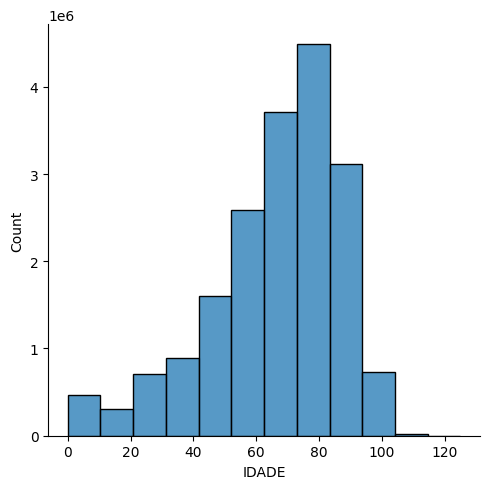

In [143]:
sns.displot(data = df_corrigido, x = 'IDADE', bins=12, weights=12)

<Axes: xlabel='IDADE'>

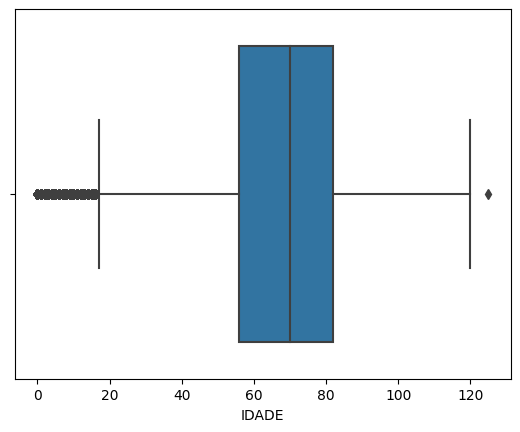

In [74]:
sns.boxplot(data = df_corrigido, x = 'IDADE')

In [55]:
# Com base no gráfico, observo uma forte tendência a uma assimetria a esquerda.
# Isso faz sentido julgando que é mais natural que quanto mais velha é uma pessoa maior a chance de morrer (CONSIDERANDO APENAS O ASPECTO NATURAL BIOLÓGICO)

In [56]:
# Agora vou comparar a distribução entre mortos com relação ao SEXO.

df_Divisao_Sexo = df_corrigido.groupby('SEXO')

Text(0, 0.5, 'Total de Mortos')

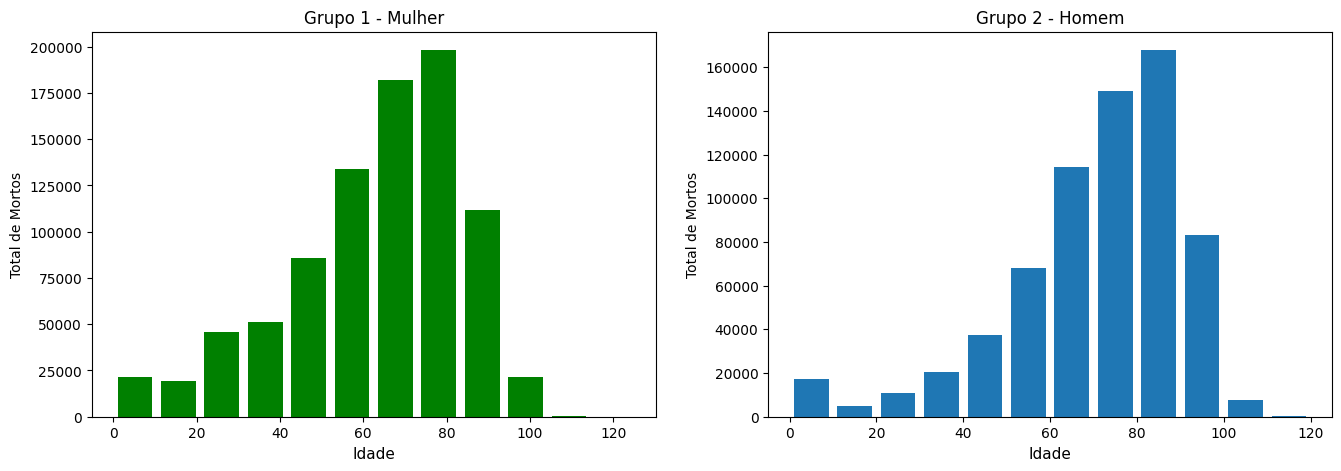

In [76]:
area = ''
area = plt.figure()
area.set_size_inches(16,5)

g1 = area.add_subplot(1,2,1)
g2 = area.add_subplot(1,2,2)


g1.hist(df_Divisao_Sexo.get_group(1)['IDADE'], color='green', rwidth=0.8, bins=12)
g1.set_title('Grupo 1 - Mulher')
g1.set_xlabel('Idade', fontsize=11)
g1.set_ylabel('Total de Mortos')


g2.hist(df_Divisao_Sexo.get_group(2)['IDADE'], rwidth=0.8, bins=12)
g2.set_title('Grupo 2 - Homem')
g2.set_xlabel('Idade', fontsize=11)
g2.set_ylabel('Total de Mortos')

In [ ]:
# Analisando os dois gráficos parece que a expectaviva de vida das mulheres é maior do que dos homens. Vou investigar mais!
# Por alguma razão a mortalidade de mulheres, entre os 12 e 45 anos, é maior do que dos homens.
# É possível perceber que, de modo geral, o número de  mulheres que morreram é bem maior que o de homens.
# É importante notar nos gráficos que as escalas verticais (para Mulher e Homem) são diferentes.

In [81]:
Qtde_Mulheres = df_Divisao_Sexo.get_group(1).shape[0]
Qtde_Homens = df_Divisao_Sexo.get_group(2).shape[0]

In [85]:
print(Qtde_Homens, Qtde_Mulheres)

681456 871339


Text(0.5, 1.0, 'Grupo 2 - Homem')

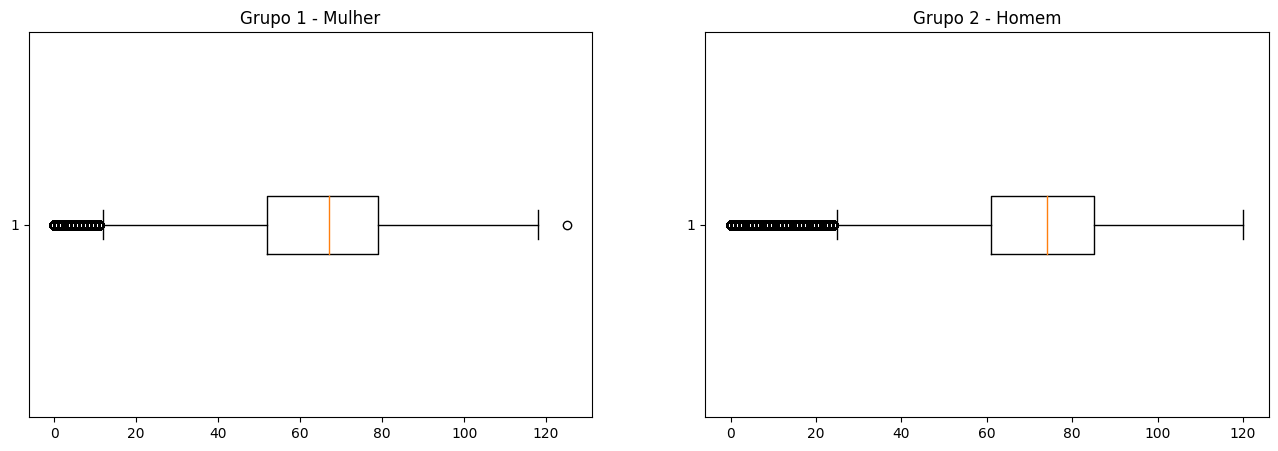

In [91]:
area = ''
area = plt.figure()
area.set_size_inches(16,5)

g1 = area.add_subplot(1,2,1)
g2 = area.add_subplot(1,2,2)


g1.boxplot(df_Divisao_Sexo.get_group(1)['IDADE'], vert=False)
g1.set_title('Grupo 1 - Mulher')



g2.boxplot(df_Divisao_Sexo.get_group(2)['IDADE'], vert=False)
g2.set_title('Grupo 2 - Homem')


In [98]:
#    Observando os boxplots vejo que a expectiva de vida dos homens é maior do que das mulheres,
# diferente do que pensei ao comparar os gráficos anteriores.


#    Com base nas informações do site https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18320-quantidade-de-homens-e-mulheres.html
# o Brasil possui mais mulheres do que homens. Considerando isso, posso considerar que o maior número de óbitos de mulheres tem relação com esse fato.


#### Resposta:
Segundo a análise dos gráficos e números, é possível dizer que a faixa etária com maior mortalidade é entre, aproximadamente 60 e 80 anos de modo geral.
Agora com relação aos sexos, a faixa etária com maior mortalidade para as mulheres é entre, aproximadamente, 55 e 75 anos. Para os homens é entre, aproximadamente, 60 e 85 anos.

### Qual sexo que mais morre?

#### Resposta:
Analisando apenas os números referentes ao ano de 2020, morreram mais mulheres do que homens, mais precisamente, morreram 189.883 mulheres a mais, o que representa do total cerca de 12%

### Qual o grau de escolaridade mais comum nos óbtos?

In [102]:
# Agora vou analisar qual é o grau de escolaridades geral mais comum dos óbtos.



#   Dicionário dos valores:
# Escolaridade 2010. Nível da última série concluída pelo falecido.
#  0 – Sem escolaridade;
#  1 – Fundamental I (1ª a 4ª série);
#  2 – Fundamental II (5ª a 8ª série);
#  3 – Médio (antigo 2º Grau);
#  4 – Superior incompleto;
#  5 – Superior completo;
#  9 – Ignorado;

In [100]:
df_corrigido['ESC2010'].value_counts()

1.0    537995
0.0    270573
2.0    259753
3.0    214129
9.0    176788
5.0     78668
4.0     15173
Name: ESC2010, dtype: int64

<Axes: xlabel='ESC2010', ylabel='Count'>

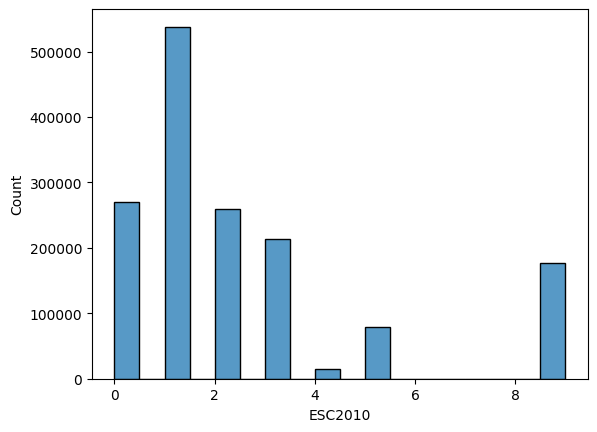

In [104]:
sns.histplot(data=df_corrigido, x='ESC2010', binwidth=0.5)

#### Resposta:
O grau de escolaridade mais comum é o nível Fundamental, com 537.995 pessoas, isso representa aproximadamente 35% dos óbitos registrados em 2020.

Ao observar o gráfico e os valores, fica claro que o Brasil ainda possúi um nível muito baixo de instrução da população.

### Há alguma possível relação entre o sexo, idade e escolaridade?

In [105]:
# Seleção das colunas que serão analisadas agora em conjunto.
# Ao criar um novo dataframe com apenas essas colunas, o processamento dos dados será mais rápido.


Col_desejadas = ['IDADE', 'SEXO', 'ESC2010']

In [106]:
df_provisorio = df_corrigido[Col_desejadas]

In [107]:
df_provisorio.head(5)

,IDADE,SEXO,ESC2010
0,87,1,1.0
1,68,2,1.0
2,59,2,1.0
3,77,2,0.0
4,84,2,0.0


In [110]:
# Primeiro quero verificar quais as idades e sexo das pessoas que tinham um nível de escolaridade maior.


nvl_alto_escolar = df_provisorio.query("ESC2010 == 4 | ESC2010 == 5")

In [111]:
nvl_alto_escolar

,IDADE,SEXO,ESC2010
5,54,2,5.0
14,73,2,5.0
37,88,2,5.0
59,37,2,5.0
135,78,1,5.0
...,...,...,...
1556766,54,2,5.0
1556787,44,1,5.0
1556803,50,2,5.0
1556813,69,1,5.0


<Axes: xlabel='IDADE', ylabel='Count'>

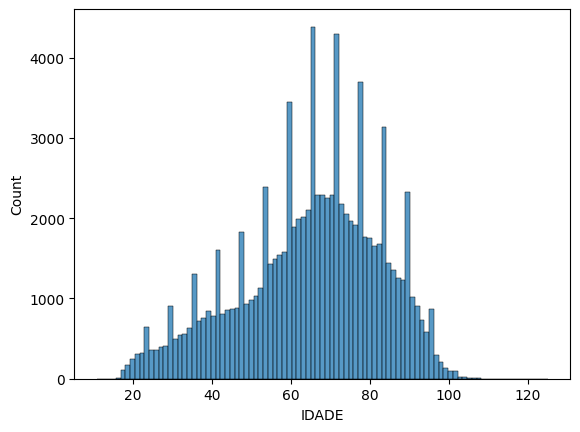

In [120]:
sns.histplot(data= nvl_alto_escolar, x= 'IDADE', binwidth=1.2,)

<Axes: xlabel='IDADE'>

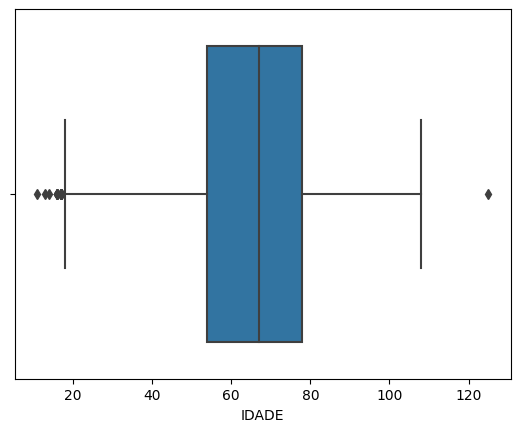

In [122]:
sns.boxplot(data= nvl_alto_escolar, x='IDADE')

In [125]:
# Minha consideração é que não há indícios de relação entre idade e escolaridade alta com esses dados.

In [126]:
nvl_alto_escolar['SEXO'].value_counts()

1    54732
2    39103
0        6
Name: SEXO, dtype: int64

In [133]:
Qtde_Homens = nvl_alto_escolar['SEXO'].value_counts()[2]
Qtde_Mulheres = nvl_alto_escolar['SEXO'].value_counts()[1]

In [142]:
print('Tabela dos mortos em 2020 com a relação ao SEXO e que tinham Escolaridade de Nível Superior:')
print('-------------------------')
print('Mulheres = ', Qtde_Mulheres)
print('Homens = ', Qtde_Homens)

Tabela dos mortos em 2020 com a relação ao SEXO e que tinham Escolaridade de Nível Superior:
-------------------------
Mulheres =  54732
Homens =  39103


 #### Resposta:
 Nota-se que o número de mulheres com nível superior é maior do que o número de homens, entretanto, não é possível fazer nenhuma afirmação da causa ou relação sobre isso, pois, como já mencionado anteriormente, o número de mulheres no Brasil é maior do que o de homens. Por causa disso, TALVEZ, esse seja um dos motivos da diferença, mas com os dados analisados não é possível afirmar.